In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset contains the following variables:

**name**: the name of the meteorite (typically a location, often modified with a number, year, composition, etc)
**id**: a unique identifier for the meteorite

**nametype**: one of:

-- valid: a typical meteorite

-- relict: a meteorite that has been highly degraded by weather on Earth

**recclass**: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics (see the Wikipedia article on meteorite classification for a primer)

**mass:** the mass of the meteorite, in grams

**fall:** whether the meteorite was seen falling, or was discovered after its impact; one of:

-- Fell: the meteorite's fall was observed

-- Found: the meteorite's fall was not observed

**year:** the year the meteorite fell, or the year it was found (depending on the value of fell)

**reclat**: the latitude of the meteorite's landing

**reclong**: the longitude of the meteorite's landing

**GeoLocation**: a parentheses-enclose, comma-separated tuple that combines reclat and reclong

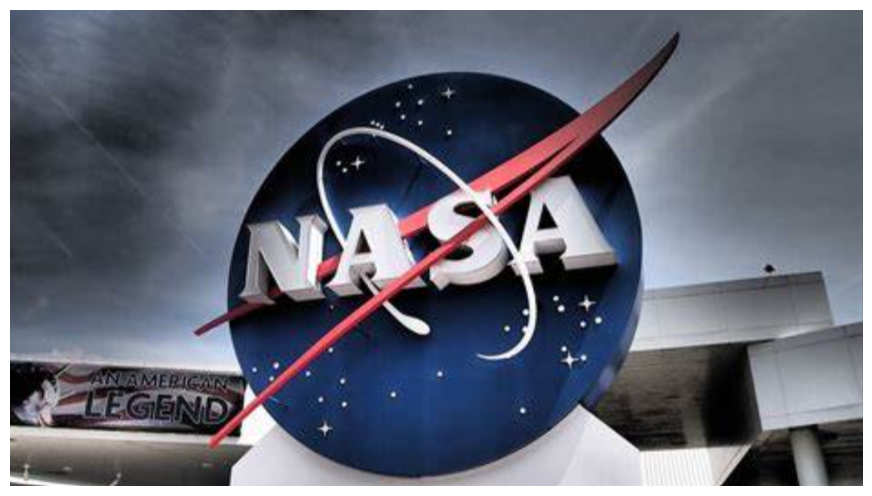

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
plt.figure(figsize=(11,11))

# Specify the path to your image file
image_path = '/content/image.png'  # Replace with your image file path

# Open the image file
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [ ]:
df=pd.read_csv('/content/meteorite-landings.csv')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


**DATA PREPROCSSING**

In [ ]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [ ]:
df.shape

(45716, 10)

In [ ]:
df.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [ ]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [ ]:
df.name.value_counts()

name
Aachen                    1
Northwest Africa 7463     1
Northwest Africa 741      1
Northwest Africa 7410     1
Northwest Africa 7412     1
                         ..
Grove Mountains 052256    1
Grove Mountains 052259    1
Grove Mountains 052260    1
Grove Mountains 052263    1
Zulu Queen                1
Name: count, Length: 45716, dtype: int64

In [ ]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [ ]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
df['recclass'].value_counts()

recclass
L6         8285
H5         7142
L5         4796
H6         4528
H4         4211
           ... 
EL7           1
CH/CBb        1
H/L~4         1
LL3.7-6       1
L/LL          1
Name: count, Length: 466, dtype: int64

<ipython-input-442-8c775c10d5dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(df['fall'],palette=palette)


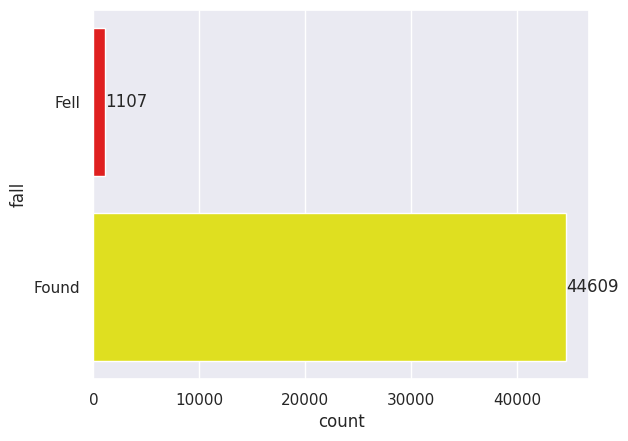

In [ ]:
sns.set()
palette=['red','yellow']
a=sns.countplot(df['fall'],palette=palette)
for ax in a.containers:
  a.bar_label(ax)

In [ ]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [ ]:
df['mass']=df['mass'].fillna(df['mass'].mean())
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass              0
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [ ]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass              0
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45716 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [ ]:
df['year'].value_counts()

year
2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
          ... 
1741.0       1
1519.0       1
1671.0       1
1779.0       1
1792.0       1
Name: count, Length: 268, dtype: int64

In [ ]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass              0
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [ ]:
df=df.drop(columns=['GeoLocation'],axis=1)
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


In [ ]:
df=df.drop(columns=['id'],axis=1)
df.head()

,name,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


In [ ]:
df.isnull().sum()

name           0
nametype       0
recclass       0
mass           0
fall           0
year         288
reclat      7315
reclong     7315
dtype: int64

In [ ]:
df['year'].dtype

dtype('float64')

In [ ]:
df['year'].dtype

dtype('float64')

In [ ]:
df['year'].value_counts()

year
2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
          ... 
1741.0       1
1519.0       1
1671.0       1
1779.0       1
1792.0       1
Name: count, Length: 268, dtype: int64

In [ ]:
df.head()

,name,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


In [ ]:
df.year.value_counts()

year
2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
          ... 
1741.0       1
1519.0       1
1671.0       1
1779.0       1
1792.0       1
Name: count, Length: 268, dtype: int64

In [ ]:
df=df.dropna()
df

,name,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...
45711,Zillah 002,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850
45712,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667
45713,Zlin,Valid,H4,3.3,Found,1939.0,49.25000,17.66667
45714,Zubkovsky,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460


In [ ]:
df.shape

(38226, 8)

In [ ]:
df.isnull().sum()

name        0
nametype    0
recclass    0
mass        0
fall        0
year        0
reclat      0
reclong     0
dtype: int64

**Data analysis**

<ipython-input-462-de95e54789ab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(df['fall'],palette='pastel')


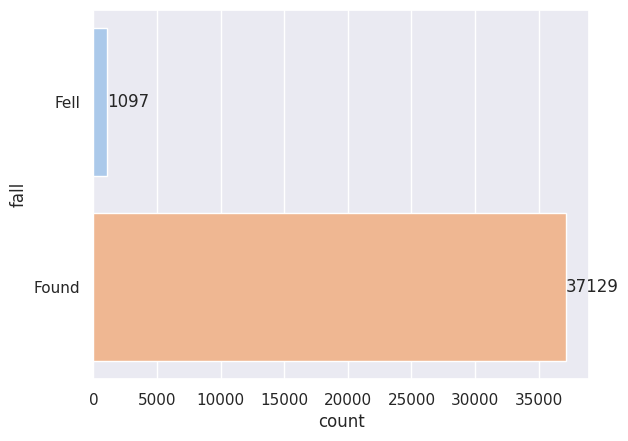

In [ ]:
a=sns.countplot(df['fall'],palette='pastel')
for ax in a.containers:
  a.bar_label(ax)

<ipython-input-463-3874a169ec8d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(df['nametype'],palette=['green','yellow'])


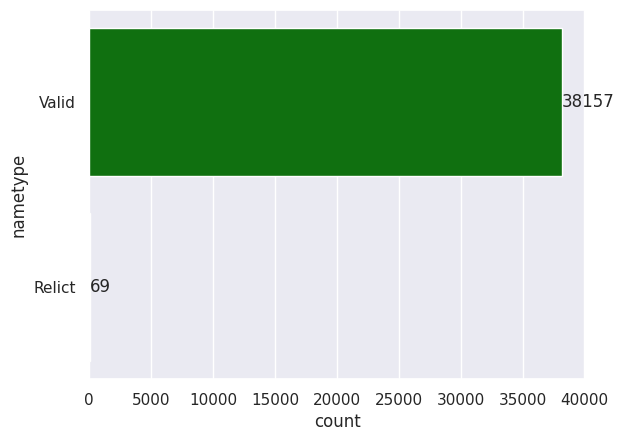

In [ ]:
a=sns.countplot(df['nametype'],palette=['green','yellow'])
for ax in a.containers:
  a.bar_label(ax)

**OUTLIER DETECTION AND REMOVE USING IQR**

<Axes: >

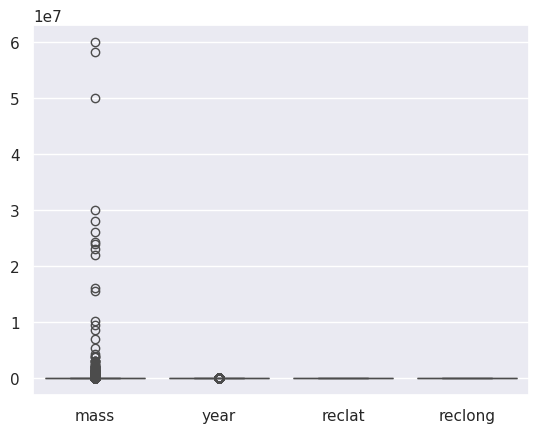

In [ ]:
sns.boxplot(df)

In [ ]:
Q1 = df['mass'].quantile(0.25)
Q3 = df['mass'].quantile(0.75)
IQR = Q3 - Q1

# Define limits for outlier removal
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers and assign back to the original column
df['mass'] = df[(df['mass'] >= lower_limit) & (df['mass'] <= upper_limit)]['mass']

print("DataFrame after removing outliers:")
print(df)

DataFrame after removing outliers:
             name nametype              recclass   mass   fall    year  \
0          Aachen    Valid                    L5   21.0   Fell  1880.0   
1          Aarhus    Valid                    H6    NaN   Fell  1951.0   
2            Abee    Valid                   EH4    NaN   Fell  1952.0   
3        Acapulco    Valid           Acapulcoite    NaN   Fell  1976.0   
4         Achiras    Valid                    L6    NaN   Fell  1902.0   
...           ...      ...                   ...    ...    ...     ...   
45711  Zillah 002    Valid               Eucrite  172.0  Found  1990.0   
45712      Zinder    Valid  Pallasite, ungrouped   46.0  Found  1999.0   
45713        Zlin    Valid                    H4    3.3  Found  1939.0   
45714   Zubkovsky    Valid                    L6    NaN  Found  2003.0   
45715  Zulu Queen    Valid                  L3.7  200.0  Found  1976.0   

         reclat    reclong  
0      50.77500    6.08333  
1      56.18333   

<Axes: >

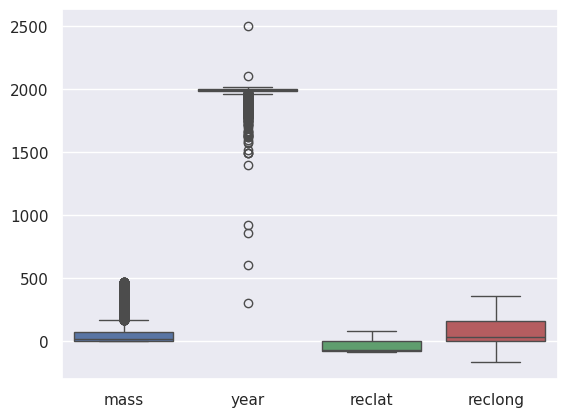

In [ ]:
sns.boxplot(df)

In [ ]:
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

# Define limits for outlier removal
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers and assign back to the original column
df['year'] = df[(df['year'] >= lower_limit) & (df['year'] <= upper_limit)]['year']

print("DataFrame after removing outliers:")
print(df)

DataFrame after removing outliers:
             name nametype              recclass   mass   fall    year  \
0          Aachen    Valid                    L5   21.0   Fell     NaN   
1          Aarhus    Valid                    H6    NaN   Fell     NaN   
2            Abee    Valid                   EH4    NaN   Fell     NaN   
3        Acapulco    Valid           Acapulcoite    NaN   Fell  1976.0   
4         Achiras    Valid                    L6    NaN   Fell     NaN   
...           ...      ...                   ...    ...    ...     ...   
45711  Zillah 002    Valid               Eucrite  172.0  Found  1990.0   
45712      Zinder    Valid  Pallasite, ungrouped   46.0  Found  1999.0   
45713        Zlin    Valid                    H4    3.3  Found     NaN   
45714   Zubkovsky    Valid                    L6    NaN  Found  2003.0   
45715  Zulu Queen    Valid                  L3.7  200.0  Found  1976.0   

         reclat    reclong  
0      50.77500    6.08333  
1      56.18333   

<Axes: >

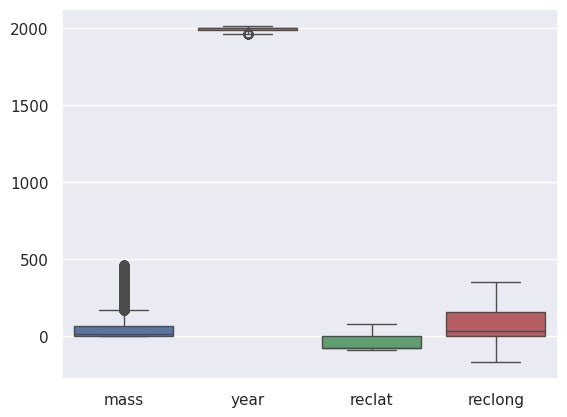

In [ ]:
sns.boxplot(df)

In [ ]:
Q1 = df['mass'].quantile(0.25)
Q3 = df['mass'].quantile(0.75)
IQR = Q3 - Q1

# Define limits for outlier removal
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers and assign back to the original column
df['mass'] = df[(df['mass'] >= lower_limit) & (df['mass'] <= upper_limit)]['mass']

print("DataFrame after removing outliers:")
print(df)

DataFrame after removing outliers:
             name nametype              recclass  mass   fall    year  \
0          Aachen    Valid                    L5  21.0   Fell     NaN   
1          Aarhus    Valid                    H6   NaN   Fell     NaN   
2            Abee    Valid                   EH4   NaN   Fell     NaN   
3        Acapulco    Valid           Acapulcoite   NaN   Fell  1976.0   
4         Achiras    Valid                    L6   NaN   Fell     NaN   
...           ...      ...                   ...   ...    ...     ...   
45711  Zillah 002    Valid               Eucrite   NaN  Found  1990.0   
45712      Zinder    Valid  Pallasite, ungrouped  46.0  Found  1999.0   
45713        Zlin    Valid                    H4   3.3  Found     NaN   
45714   Zubkovsky    Valid                    L6   NaN  Found  2003.0   
45715  Zulu Queen    Valid                  L3.7   NaN  Found  1976.0   

         reclat    reclong  
0      50.77500    6.08333  
1      56.18333   10.23333  
2

<Axes: >

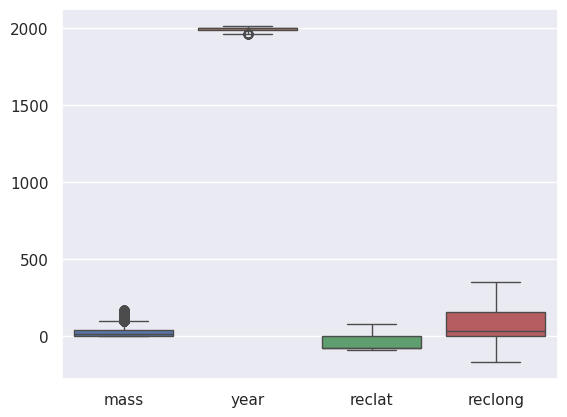

In [ ]:
sns.boxplot(df)

In [ ]:
Q1 = df['mass'].quantile(0.25)
Q3 = df['mass'].quantile(0.75)
IQR = Q3 - Q1

# Define limits for outlier removal
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers and assign back to the original column
df['mass'] = df[(df['mass'] >= lower_limit) & (df['mass'] <= upper_limit)]['mass']

print("DataFrame after removing outliers:")
print(df)

DataFrame after removing outliers:
             name nametype              recclass  mass   fall    year  \
0          Aachen    Valid                    L5  21.0   Fell     NaN   
1          Aarhus    Valid                    H6   NaN   Fell     NaN   
2            Abee    Valid                   EH4   NaN   Fell     NaN   
3        Acapulco    Valid           Acapulcoite   NaN   Fell  1976.0   
4         Achiras    Valid                    L6   NaN   Fell     NaN   
...           ...      ...                   ...   ...    ...     ...   
45711  Zillah 002    Valid               Eucrite   NaN  Found  1990.0   
45712      Zinder    Valid  Pallasite, ungrouped  46.0  Found  1999.0   
45713        Zlin    Valid                    H4   3.3  Found     NaN   
45714   Zubkovsky    Valid                    L6   NaN  Found  2003.0   
45715  Zulu Queen    Valid                  L3.7   NaN  Found  1976.0   

         reclat    reclong  
0      50.77500    6.08333  
1      56.18333   10.23333  
2

<Axes: >

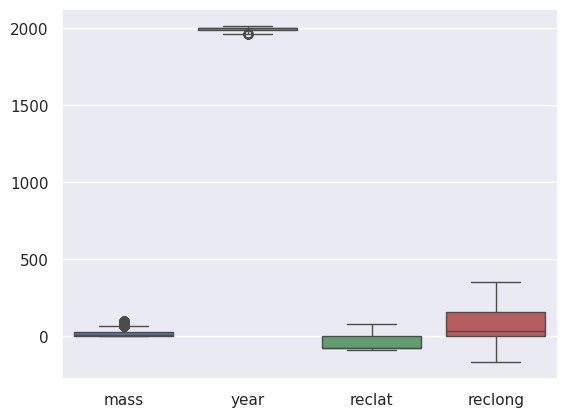

In [ ]:
sns.boxplot(df)

In [ ]:
Q1 = df['mass'].quantile(0.25)
Q3 = df['mass'].quantile(0.75)
IQR = Q3 - Q1

# Define limits for outlier removal
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers and assign back to the original column
df['mass'] = df[(df['mass'] >= lower_limit) & (df['mass'] <= upper_limit)]['mass']

print("DataFrame after removing outliers:")
print(df)

DataFrame after removing outliers:
             name nametype              recclass  mass   fall    year  \
0          Aachen    Valid                    L5  21.0   Fell     NaN   
1          Aarhus    Valid                    H6   NaN   Fell     NaN   
2            Abee    Valid                   EH4   NaN   Fell     NaN   
3        Acapulco    Valid           Acapulcoite   NaN   Fell  1976.0   
4         Achiras    Valid                    L6   NaN   Fell     NaN   
...           ...      ...                   ...   ...    ...     ...   
45711  Zillah 002    Valid               Eucrite   NaN  Found  1990.0   
45712      Zinder    Valid  Pallasite, ungrouped  46.0  Found  1999.0   
45713        Zlin    Valid                    H4   3.3  Found     NaN   
45714   Zubkovsky    Valid                    L6   NaN  Found  2003.0   
45715  Zulu Queen    Valid                  L3.7   NaN  Found  1976.0   

         reclat    reclong  
0      50.77500    6.08333  
1      56.18333   10.23333  
2

<Axes: >

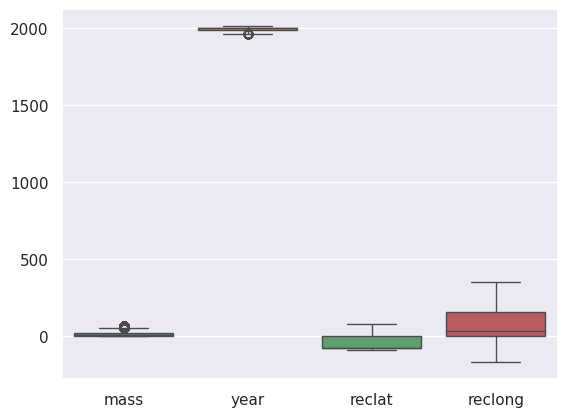

In [ ]:
sns.boxplot(df)

In [ ]:
Q1 = df['mass'].quantile(0.25)
Q3 = df['mass'].quantile(0.75)
IQR = Q3 - Q1

# Define limits for outlier removal
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers and assign back to the original column
df['mass'] = df[(df['mass'] >= lower_limit) & (df['mass'] <= upper_limit)]['mass']

print("DataFrame after removing outliers:")
print(df)

DataFrame after removing outliers:
             name nametype              recclass  mass   fall    year  \
0          Aachen    Valid                    L5  21.0   Fell     NaN   
1          Aarhus    Valid                    H6   NaN   Fell     NaN   
2            Abee    Valid                   EH4   NaN   Fell     NaN   
3        Acapulco    Valid           Acapulcoite   NaN   Fell  1976.0   
4         Achiras    Valid                    L6   NaN   Fell     NaN   
...           ...      ...                   ...   ...    ...     ...   
45711  Zillah 002    Valid               Eucrite   NaN  Found  1990.0   
45712      Zinder    Valid  Pallasite, ungrouped  46.0  Found  1999.0   
45713        Zlin    Valid                    H4   3.3  Found     NaN   
45714   Zubkovsky    Valid                    L6   NaN  Found  2003.0   
45715  Zulu Queen    Valid                  L3.7   NaN  Found  1976.0   

         reclat    reclong  
0      50.77500    6.08333  
1      56.18333   10.23333  
2

<Axes: >

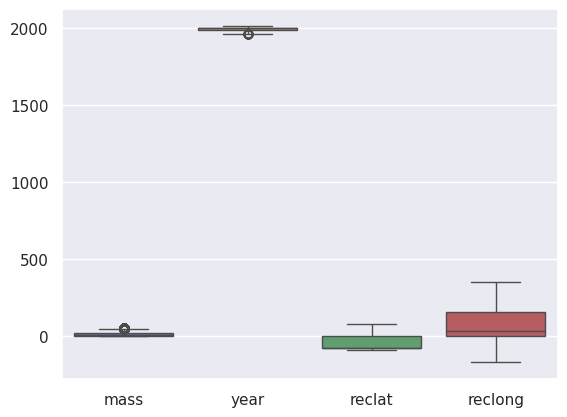

In [ ]:
sns.boxplot(df)

In [ ]:
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

# Define limits for outlier removal
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers and assign back to the original column
df['year'] = df[(df['year'] >= lower_limit) & (df['year'] <= upper_limit)]['year']

print("DataFrame after removing outliers:")
print(df)

DataFrame after removing outliers:
             name nametype              recclass  mass   fall    year  \
0          Aachen    Valid                    L5  21.0   Fell     NaN   
1          Aarhus    Valid                    H6   NaN   Fell     NaN   
2            Abee    Valid                   EH4   NaN   Fell     NaN   
3        Acapulco    Valid           Acapulcoite   NaN   Fell  1976.0   
4         Achiras    Valid                    L6   NaN   Fell     NaN   
...           ...      ...                   ...   ...    ...     ...   
45711  Zillah 002    Valid               Eucrite   NaN  Found  1990.0   
45712      Zinder    Valid  Pallasite, ungrouped  46.0  Found  1999.0   
45713        Zlin    Valid                    H4   3.3  Found     NaN   
45714   Zubkovsky    Valid                    L6   NaN  Found  2003.0   
45715  Zulu Queen    Valid                  L3.7   NaN  Found  1976.0   

         reclat    reclong  
0      50.77500    6.08333  
1      56.18333   10.23333  
2

<Axes: >

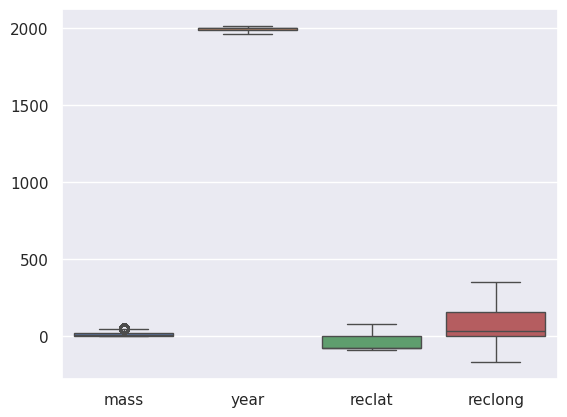

In [ ]:
sns.boxplot(df)

In [ ]:
Q1 = df['mass'].quantile(0.25)
Q3 = df['mass'].quantile(0.75)
IQR = Q3 - Q1

# Define limits for outlier removal
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter out outliers and assign back to the original column
df['mass'] = df[(df['mass'] >= lower_limit) & (df['mass'] <= upper_limit)]['mass']

print("DataFrame after removing outliers:")
print(df)

DataFrame after removing outliers:
             name nametype              recclass  mass   fall    year  \
0          Aachen    Valid                    L5  21.0   Fell     NaN   
1          Aarhus    Valid                    H6   NaN   Fell     NaN   
2            Abee    Valid                   EH4   NaN   Fell     NaN   
3        Acapulco    Valid           Acapulcoite   NaN   Fell  1976.0   
4         Achiras    Valid                    L6   NaN   Fell     NaN   
...           ...      ...                   ...   ...    ...     ...   
45711  Zillah 002    Valid               Eucrite   NaN  Found  1990.0   
45712      Zinder    Valid  Pallasite, ungrouped  46.0  Found  1999.0   
45713        Zlin    Valid                    H4   3.3  Found     NaN   
45714   Zubkovsky    Valid                    L6   NaN  Found  2003.0   
45715  Zulu Queen    Valid                  L3.7   NaN  Found  1976.0   

         reclat    reclong  
0      50.77500    6.08333  
1      56.18333   10.23333  
2

<Axes: >

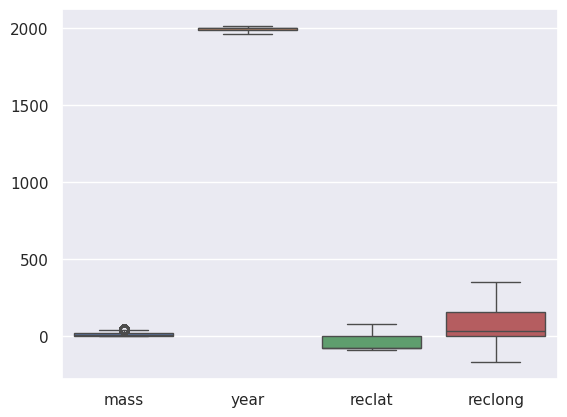

In [ ]:
sns.boxplot(df)

In [ ]:
#finally outlier has been removed after performing multiple times of IQR

In [ ]:
df.head()

,name,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,Valid,L5,21.0,Fell,NaN,50.77500,6.08333
1,Aarhus,Valid,H6,NaN,Fell,NaN,56.18333,10.23333
2,Abee,Valid,EH4,NaN,Fell,NaN,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,NaN,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,NaN,Fell,NaN,-33.16667,-64.95000


In [ ]:
df.head()

,name,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,Valid,L5,21.0,Fell,NaN,50.77500,6.08333
1,Aarhus,Valid,H6,NaN,Fell,NaN,56.18333,10.23333
2,Abee,Valid,EH4,NaN,Fell,NaN,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,NaN,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,NaN,Fell,NaN,-33.16667,-64.95000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38226 entries, 0 to 45715
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      38226 non-null  object 
 1   nametype  38226 non-null  object 
 2   recclass  38226 non-null  object 
 3   mass      21967 non-null  float64
 4   fall      38226 non-null  object 
 5   year      36257 non-null  float64
 6   reclat    38226 non-null  float64
 7   reclong   38226 non-null  float64
dtypes: float64(4), object(4)
memory usage: 2.6+ MB


In [ ]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21887 entries, 260 to 45712
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      21887 non-null  object 
 1   nametype  21887 non-null  object 
 2   recclass  21887 non-null  object 
 3   mass      21887 non-null  float64
 4   fall      21887 non-null  object 
 5   year      21887 non-null  float64
 6   reclat    21887 non-null  float64
 7   reclong   21887 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.5+ MB


In [ ]:
df.head()

,name,nametype,recclass,mass,fall,year,reclat,reclong
260,Dunbogan,Valid,L6,30.00,Fell,1999.0,-31.66667,152.83333
337,Grefsheim,Valid,L5,45.50,Fell,1976.0,60.66667,11.00000
509,Kutais,Valid,H5,23.00,Fell,1977.0,44.51667,39.30000
587,Maribo,Valid,CM2,25.81,Fell,2009.0,54.76183,11.46745
596,Mason Gully,Valid,H5,24.54,Fell,2010.0,0.00000,0.00000


In [ ]:
df=df.drop(columns=['name'],axis=1)
df.head()

,nametype,recclass,mass,fall,year,reclat,reclong
260,Valid,L6,30.00,Fell,1999.0,-31.66667,152.83333
337,Valid,L5,45.50,Fell,1976.0,60.66667,11.00000
509,Valid,H5,23.00,Fell,1977.0,44.51667,39.30000
587,Valid,CM2,25.81,Fell,2009.0,54.76183,11.46745
596,Valid,H5,24.54,Fell,2010.0,0.00000,0.00000


In [ ]:
df.isnull().sum()

nametype    0
recclass    0
mass        0
fall        0
year        0
reclat      0
reclong     0
dtype: int64

In [ ]:
df['year'].value_counts()

year
1979.0    2394
1998.0    1549
1988.0    1420
2003.0    1321
1986.0    1179
2006.0    1057
1990.0    1003
1999.0     966
1997.0     963
2009.0     852
1993.0     774
2000.0     639
2007.0     626
1974.0     558
1994.0     550
2001.0     548
1987.0     528
2002.0     509
2008.0     491
2010.0     470
1991.0     422
1981.0     322
1996.0     275
1975.0     273
1977.0     264
1985.0     239
1992.0     231
1984.0     227
2011.0     226
1982.0     224
1983.0     168
1978.0     134
2004.0     121
1995.0     110
1980.0      73
2005.0      69
2012.0      26
1969.0      16
1973.0      12
1968.0      11
1989.0       8
1963.0       7
1971.0       7
1970.0       6
1965.0       4
1976.0       4
1966.0       3
1967.0       3
2013.0       3
1964.0       1
1972.0       1
Name: count, dtype: int64

In [ ]:
df['years'] = np.where(df['year'] >= 2000, 'latest',
                       np.where((df['year'] >= 1980) & (df['year'] < 2000), 'normal', 'older'))

In [ ]:
df['years'].value_counts()

years
normal    11231
latest     6958
older      3698
Name: count, dtype: int64

In [ ]:
df=df.drop(columns='year',axis=1)
df

,nametype,recclass,mass,fall,reclat,reclong,years
260,Valid,L6,30.00,Fell,-31.66667,152.83333,normal
337,Valid,L5,45.50,Fell,60.66667,11.00000,older
509,Valid,H5,23.00,Fell,44.51667,39.30000,older
587,Valid,CM2,25.81,Fell,54.76183,11.46745,latest
596,Valid,H5,24.54,Fell,0.00000,0.00000,latest
...,...,...,...,...,...,...,...
45673,Valid,L6,4.50,Found,39.55801,-114.42715,latest
45687,Valid,H-metal,3.00,Found,34.81970,-114.27610,latest
45688,Valid,H5,25.90,Found,34.82658,-114.27763,latest
45699,Valid,L4,27.70,Found,18.33333,-97.50000,normal


In [ ]:
df['recclass'].value_counts()

recclass
L6                      4204
H5                      3826
H6                      2557
H4                      2551
L5                      1817
                        ... 
K3                         1
LL-imp melt                1
R                          1
L~4                        1
Pallasite, ungrouped       1
Name: count, Length: 250, dtype: int64

In [ ]:
df['reclat'] = np.where(df['reclat'] >= 0, 'Northen Hemisphere','Southern Hemisphere')
df

,nametype,recclass,mass,fall,reclat,reclong,years
260,Valid,L6,30.00,Fell,Southern Hemisphere,152.83333,normal
337,Valid,L5,45.50,Fell,Northen Hemisphere,11.00000,older
509,Valid,H5,23.00,Fell,Northen Hemisphere,39.30000,older
587,Valid,CM2,25.81,Fell,Northen Hemisphere,11.46745,latest
596,Valid,H5,24.54,Fell,Northen Hemisphere,0.00000,latest
...,...,...,...,...,...,...,...
45673,Valid,L6,4.50,Found,Northen Hemisphere,-114.42715,latest
45687,Valid,H-metal,3.00,Found,Northen Hemisphere,-114.27610,latest
45688,Valid,H5,25.90,Found,Northen Hemisphere,-114.27763,latest
45699,Valid,L4,27.70,Found,Northen Hemisphere,-97.50000,normal


In [ ]:
df['reclong'] = np.where(df['reclong'] < 0, 'Western Hemisphere','Eastern Hemisphere')
df

,nametype,recclass,mass,fall,reclat,reclong,years
260,Valid,L6,30.00,Fell,Southern Hemisphere,Eastern Hemisphere,normal
337,Valid,L5,45.50,Fell,Northen Hemisphere,Eastern Hemisphere,older
509,Valid,H5,23.00,Fell,Northen Hemisphere,Eastern Hemisphere,older
587,Valid,CM2,25.81,Fell,Northen Hemisphere,Eastern Hemisphere,latest
596,Valid,H5,24.54,Fell,Northen Hemisphere,Eastern Hemisphere,latest
...,...,...,...,...,...,...,...
45673,Valid,L6,4.50,Found,Northen Hemisphere,Western Hemisphere,latest
45687,Valid,H-metal,3.00,Found,Northen Hemisphere,Western Hemisphere,latest
45688,Valid,H5,25.90,Found,Northen Hemisphere,Western Hemisphere,latest
45699,Valid,L4,27.70,Found,Northen Hemisphere,Western Hemisphere,normal


In [ ]:
df['mass'] = np.where((df['mass'] >= 0) & (df['mass'] <= 10), 'small',
                               np.where((df['mass'] > 10) & (df['mass'] < 30), 'medium',
                                        np.where((df['mass'] >= 30) & (df['mass'] < 50), 'large', 'very large')))

In [ ]:
df.head()

,nametype,recclass,mass,fall,reclat,reclong,years
260,Valid,L6,large,Fell,Southern Hemisphere,Eastern Hemisphere,normal
337,Valid,L5,large,Fell,Northen Hemisphere,Eastern Hemisphere,older
509,Valid,H5,medium,Fell,Northen Hemisphere,Eastern Hemisphere,older
587,Valid,CM2,medium,Fell,Northen Hemisphere,Eastern Hemisphere,latest
596,Valid,H5,medium,Fell,Northen Hemisphere,Eastern Hemisphere,latest


**Data Visualization**

<ipython-input-498-ce66c0cadf14>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(df['nametype'],palette=['red','yellow'])


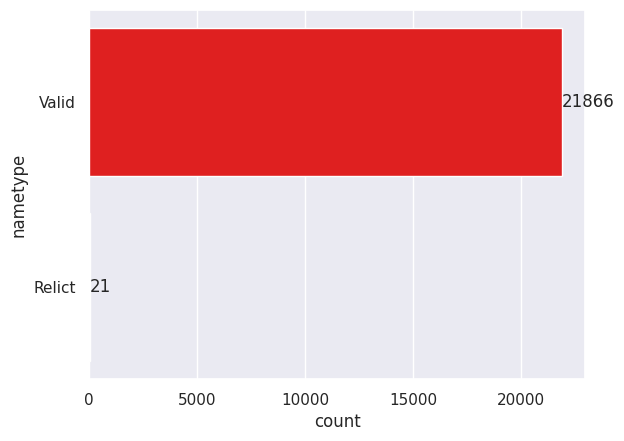

In [ ]:
a=sns.countplot(df['nametype'],palette=['red','yellow'])
for ax in a.containers:
  a.bar_label(ax)

In [ ]:
df['mass'].value_counts()

mass
small     12116
medium     7058
large      2713
Name: count, dtype: int64

<ipython-input-500-4f1fa7e6bbd4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(df['mass'],palette=['blue','black','yellow'])


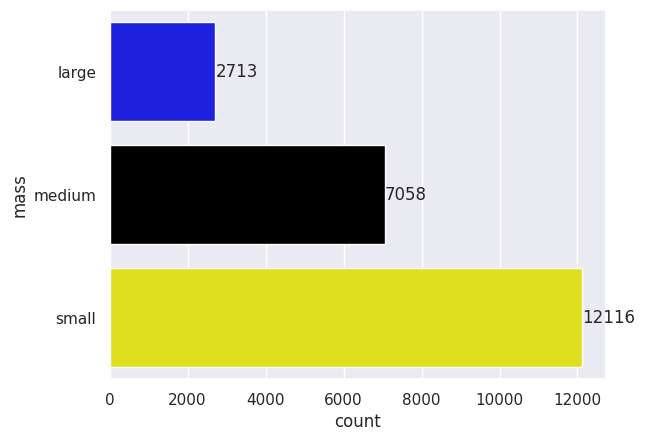

In [ ]:
a=sns.countplot(df['mass'],palette=['blue','black','yellow'])
for ax in a.containers:
  a.bar_label(ax)

In [ ]:
df.columns #mass , nametype , fall,reclat

Index(['nametype', 'recclass', 'mass', 'fall', 'reclat', 'reclong', 'years'], dtype='object')

<ipython-input-502-d685611a9610>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(df['fall'],palette=['yellow','green'])


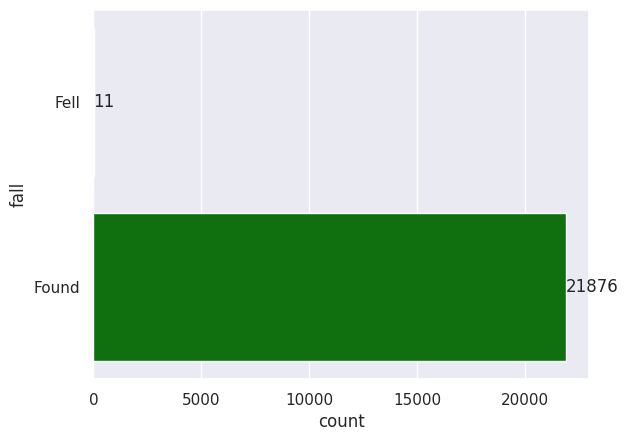

In [ ]:
a=sns.countplot(df['fall'],palette=['yellow','green'])
for ax in a.containers:
  a.bar_label(ax)

<ipython-input-503-f454ee67b9f8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(df['reclat'],palette=['green','yellow'])


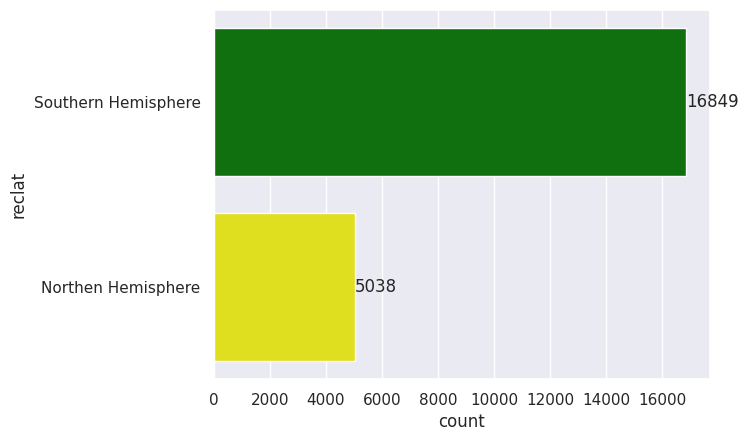

In [ ]:
a=sns.countplot(df['reclat'],palette=['green','yellow'])
for ax in a.containers:
  a.bar_label(ax)

<ipython-input-504-23c2dc1d1e1a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(df['reclong'],palette=['red','yellow'])


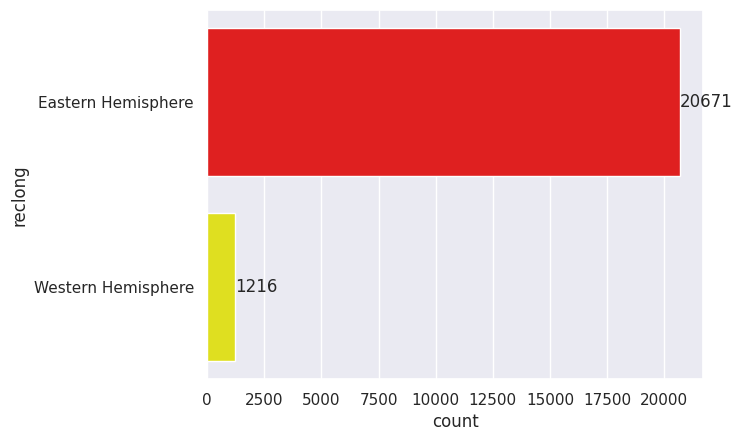

In [ ]:
a=sns.countplot(df['reclong'],palette=['red','yellow'])
for ax in a.containers:
  a.bar_label(ax)

<ipython-input-505-a271d47953a8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(df['years'],palette=['blue','black','green'])


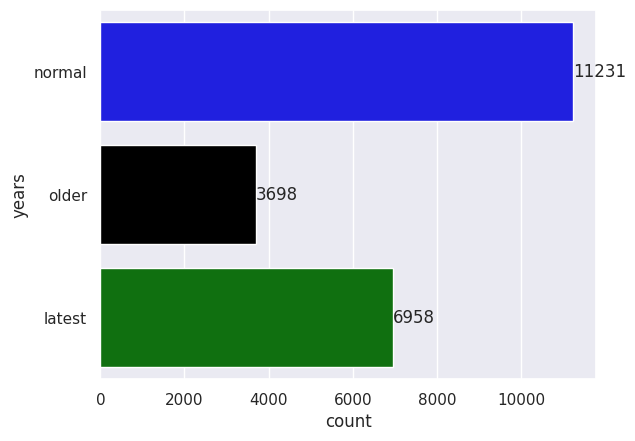

In [ ]:
a=sns.countplot(df['years'],palette=['blue','black','green'])
for ax in a.containers:
  a.bar_label(ax)

In [ ]:
df.head()

,nametype,recclass,mass,fall,reclat,reclong,years
260,Valid,L6,large,Fell,Southern Hemisphere,Eastern Hemisphere,normal
337,Valid,L5,large,Fell,Northen Hemisphere,Eastern Hemisphere,older
509,Valid,H5,medium,Fell,Northen Hemisphere,Eastern Hemisphere,older
587,Valid,CM2,medium,Fell,Northen Hemisphere,Eastern Hemisphere,latest
596,Valid,H5,medium,Fell,Northen Hemisphere,Eastern Hemisphere,latest


In [ ]:
df.columns

Index(['nametype', 'recclass', 'mass', 'fall', 'reclat', 'reclong', 'years'], dtype='object')

**MACHINE LEARNING MODEL**

In [ ]:
df.head()

,nametype,recclass,mass,fall,reclat,reclong,years
260,Valid,L6,large,Fell,Southern Hemisphere,Eastern Hemisphere,normal
337,Valid,L5,large,Fell,Northen Hemisphere,Eastern Hemisphere,older
509,Valid,H5,medium,Fell,Northen Hemisphere,Eastern Hemisphere,older
587,Valid,CM2,medium,Fell,Northen Hemisphere,Eastern Hemisphere,latest
596,Valid,H5,medium,Fell,Northen Hemisphere,Eastern Hemisphere,latest


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['nametype'].value_counts()

nametype
Valid     21866
Relict       21
Name: count, dtype: int64

In [ ]:
df['nametype']=le.fit_transform(df['nametype'])
df['nametype'].value_counts() #valid=1 , relict = 0

nametype
1    21866
0       21
Name: count, dtype: int64

In [ ]:
df['mass'].value_counts()

mass
small     12116
medium     7058
large      2713
Name: count, dtype: int64

In [ ]:
df['mass']=le.fit_transform(df['mass'])
df['mass'].value_counts() # small = 2 , medium = 1, large = 0

mass
2    12116
1     7058
0     2713
Name: count, dtype: int64

In [ ]:
df['fall'].value_counts()

fall
Found    21876
Fell        11
Name: count, dtype: int64

In [ ]:
df['fall']=le.fit_transform(df['fall'])
df['fall'].value_counts() # found = 1 , fell = 0

fall
1    21876
0       11
Name: count, dtype: int64

In [ ]:
df['reclat'].value_counts()

reclat
Southern Hemisphere    16849
Northen Hemisphere      5038
Name: count, dtype: int64

In [ ]:
df['reclat']=le.fit_transform(df['reclat'])
df['reclat'].value_counts() # southern hemisphere=1 , northern hemisphere= 0

reclat
1    16849
0     5038
Name: count, dtype: int64

In [ ]:
df['reclong'].value_counts()

reclong
Eastern Hemisphere    20671
Western Hemisphere     1216
Name: count, dtype: int64

In [ ]:
df['reclong']=le.fit_transform(df['reclong'])
df['reclong'].value_counts() # eastern hemisphere=0 , western hemisphere= 1

reclong
0    20671
1     1216
Name: count, dtype: int64

In [ ]:
df['years'].value_counts()

years
normal    11231
latest     6958
older      3698
Name: count, dtype: int64

In [ ]:
df['years']=le.fit_transform(df['years'])
df['years'].value_counts() # normal = 1 , latest=0 ,older =2

years
1    11231
0     6958
2     3698
Name: count, dtype: int64

In [ ]:
#to predict the fall

In [ ]:
X=df.drop('fall',axis=1)
y=df['fall']

In [ ]:
df.columns

Index(['nametype', 'recclass', 'mass', 'fall', 'reclat', 'reclong', 'years'], dtype='object')

In [ ]:
df.head()

,nametype,recclass,mass,fall,reclat,reclong,years
260,1,L6,0,0,1,0,1
337,1,L5,0,0,0,0,2
509,1,H5,1,0,0,0,2
587,1,CM2,1,0,0,0,0
596,1,H5,1,0,0,0,0


In [ ]:
df.head()

,nametype,recclass,mass,fall,reclat,reclong,years
260,1,L6,0,0,1,0,1
337,1,L5,0,0,0,0,2
509,1,H5,1,0,0,0,2
587,1,CM2,1,0,0,0,0
596,1,H5,1,0,0,0,0


In [ ]:
df.to_csv('nasa.csv', index=False)

**MACHINE LERNING MODEL**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('nasa.csv')

In [ ]:
df=df.drop(columns=['recclass'],axis=1)

In [ ]:
df.head()

,nametype,mass,fall,reclat,reclong,years
0,1,0,0,1,0,1
1,1,0,0,0,0,2
2,1,1,0,0,0,2
3,1,1,0,0,0,0
4,1,1,0,0,0,0


In [ ]:
X=df.drop(columns='fall',axis=1)
y=df['fall']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train)

17509

In [ ]:
len(X_test)

4378

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model1 = LogisticRegression()


model1.fit(X_train, y_train)
print("model score train :",model1.score(X_train,y_train))
print("model score test :",model1.score(X_test,y_test))


y_pred = model1.predict(X_test)

# Example: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{report}')


model score train : 0.9994859786395568
model score test : 0.9995431703974418
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      4376

    accuracy                           1.00      4378
   macro avg       0.50      0.50      0.50      4378
weighted avg       1.00      1.00      1.00      4378



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


model2 = DecisionTreeClassifier()


model2.fit(X_train, y_train)
print("model train score :",model2.score(X_train,y_train))
print("model test score :",model2.score(X_test,y_test))


y_pred = model2.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{report}')


model train score : 0.9994859786395568
model test score : 0.9995431703974418
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      4376

    accuracy                           1.00      4378
   macro avg       0.50      0.50      0.50      4378
weighted avg       1.00      1.00      1.00      4378



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model3 = RandomForestClassifier()


model3.fit(X_train, y_train)
print("model train score :",model3.score(X_train,y_train))
print("model test score :",model3.score(X_test,y_test))


y_pred = model3.predict(X_test)

# Example: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{report}')


model train score : 0.9994859786395568
model test score : 0.9995431703974418
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      4376

    accuracy                           1.00      4378
   macro avg       0.50      0.50      0.50      4378
weighted avg       1.00      1.00      1.00      4378



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM**

In [ ]:
from sklearn.svm import SVC

# Example: Instantiate the model
model4 = SVC()

# Example: Fit the model on training data
model4.fit(X_train, y_train)
print("model train score :",model4.score(X_train,y_train))
print("model test score :",model4.score(X_test,y_test))

# Example: Predict on test data
y_pred = model4.predict(X_test)

# Example: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{report}')


model train score : 0.9994859786395568
model test score : 0.9995431703974418
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      4376

    accuracy                           1.00      4378
   macro avg       0.50      0.50      0.50      4378
weighted avg       1.00      1.00      1.00      4378



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Example: Instantiate the model
model = KNeighborsClassifier()

# Example: Fit the model on training data
model.fit(X_train, y_train)
print("model train score :",model4.score(X_train,y_train))
print("model test score :",model4.score(X_test,y_test))

# Example: Predict on test data
y_pred = model.predict(X_test)

# Example: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{report}')


model train score : 0.9994859786395568
model test score : 0.9995431703974418
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      4376

    accuracy                           1.00      4378
   macro avg       0.50      0.50      0.50      4378
weighted avg       1.00      1.00      1.00      4378



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#all models work better in case of this dataset

<Axes: >

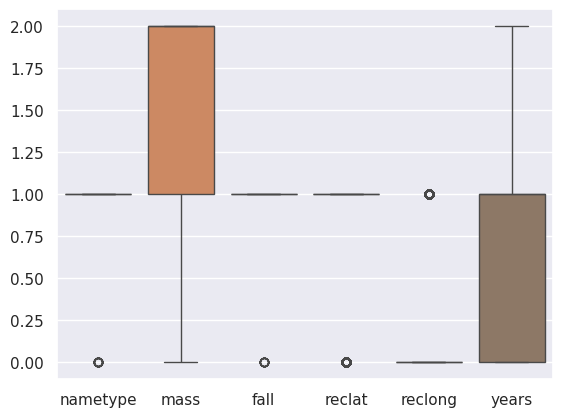

In [ ]:
sns.boxplot(df) # no outler present

**CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score

# Example with 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean():.4f}")


Cross-Validation Scores: [0.99931476 0.99954317 0.99954307 0.99954307 0.99954307]
Mean CV Accuracy: 0.9995


**Learning Curves:**

**USING OF ANN**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Initialize the ANN
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

# Add dropout regularization
model.add(Dropout(0.2))  # 20% dropout

# Add the second hidden layer
model.add(Dense(units=64, activation='relu'))

# Add dropout regularization
model.add(Dropout(0.2))  # 20% dropout

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9089 (35.50 KB)
Trainable params: 9089 (35.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/50
548/548 [==============================] - 9s 13ms/step - loss: 0.0247 - accuracy: 0.9978 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 2/50
548/548 [==============================] - 5s 9ms/step - loss: 0.0041 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy: 0.9995
Epoch 3/50
548/548 [==============================] - 2s 3ms/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 0.0041 - val_accuracy: 0.9995
Epoch 4/50
548/548 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0046 - val_accuracy: 0.9995
Epoch 5/50
548/548 [==============================] - 2s 3ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.0045 - val_accuracy: 0.9995
Epoch 6/50
548/548 [==============================] - 2s 4ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.0044 - val_accuracy: 0.9995
Epoch 7/50
548/548 [==============================] - 2s 3ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0047 - val_accuracy: 0.9995
Epoch

In [ ]:
# Predict on test data
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{report}')


137/137 [==============================] - 1s 3ms/step
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00      4376

    accuracy                           1.00      4378
   macro avg       0.50      0.50      0.50      4378
weighted avg       1.00      1.00      1.00      4378



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
